In [32]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('taxi_trip_pricing.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.0 seconds

Missing values: 549
Duplicated values: 0

Missing values by column:
Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

Unique Values in Each Column:
Trip_Distance_km         867
Time_of_Day                4
Day_of_Week                2
Passenger_Count            4
Traffic_Conditions         3
Weather                    3
Base_Fare                290
Per_Km_Rate              150
Per_Minute_Rate           41
Trip_Duration_Minutes    917
Trip_Price               951
dtype: int64


In [33]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [34]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
Categorical Columns: ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']


In [35]:
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

In [36]:
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [37]:
df = df[~df['Passenger_Count'].between(2.3, 2.7)]
df.shape

(1000, 11)

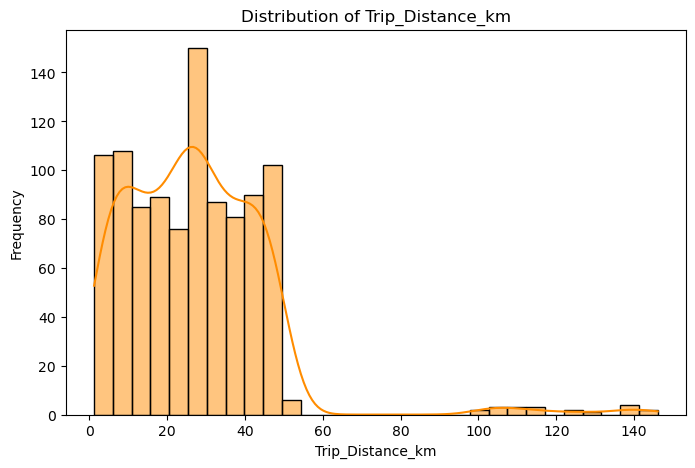

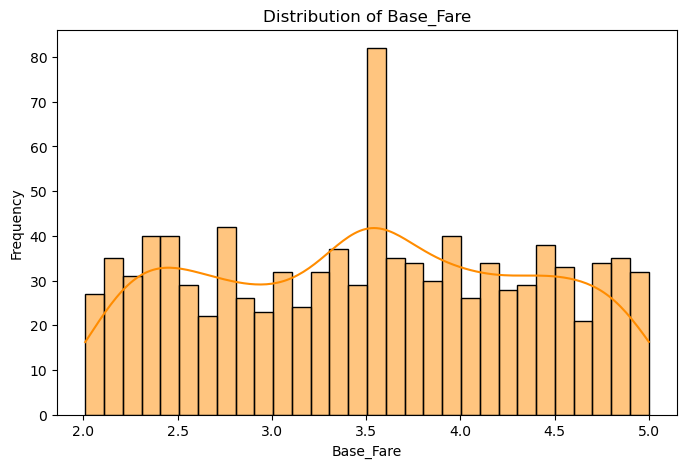

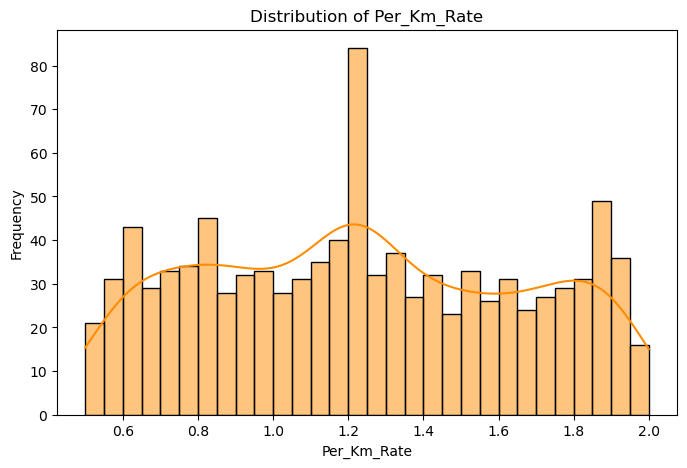

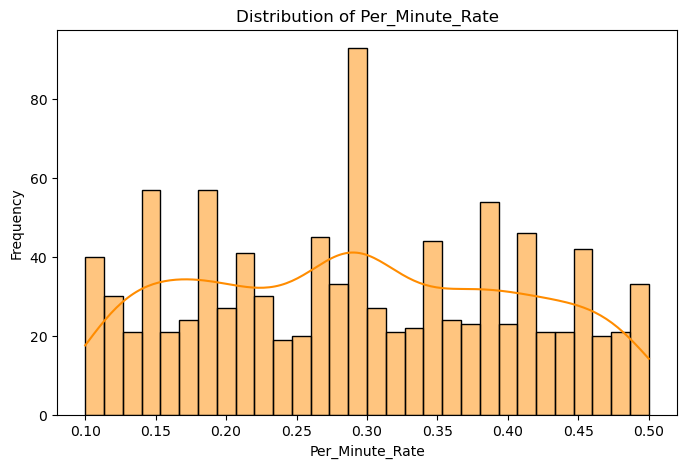

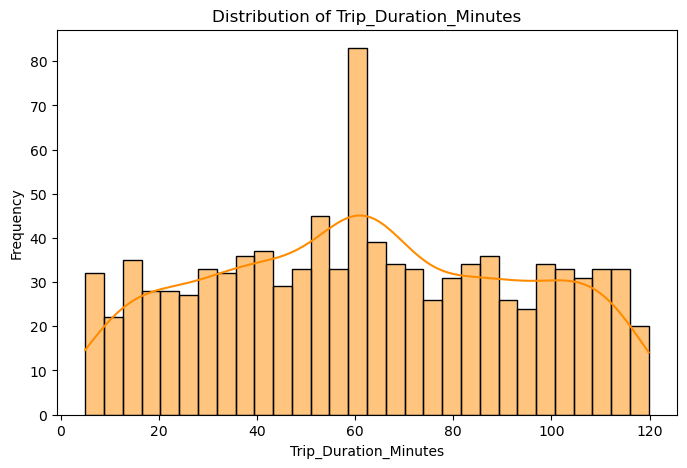

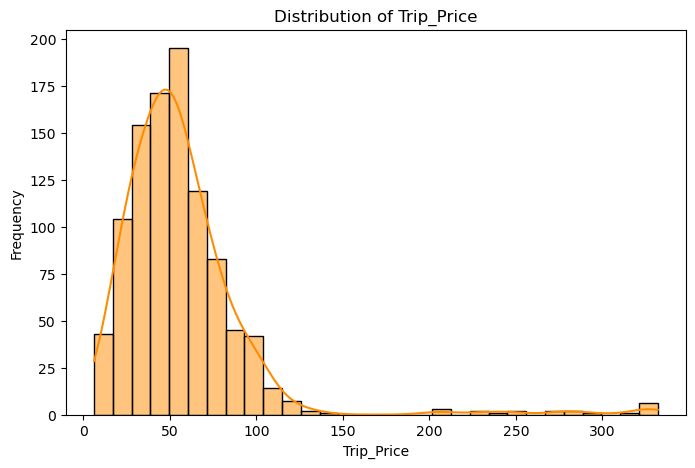

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


numerical_columns = ['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
plot_histograms(df, numerical_columns)

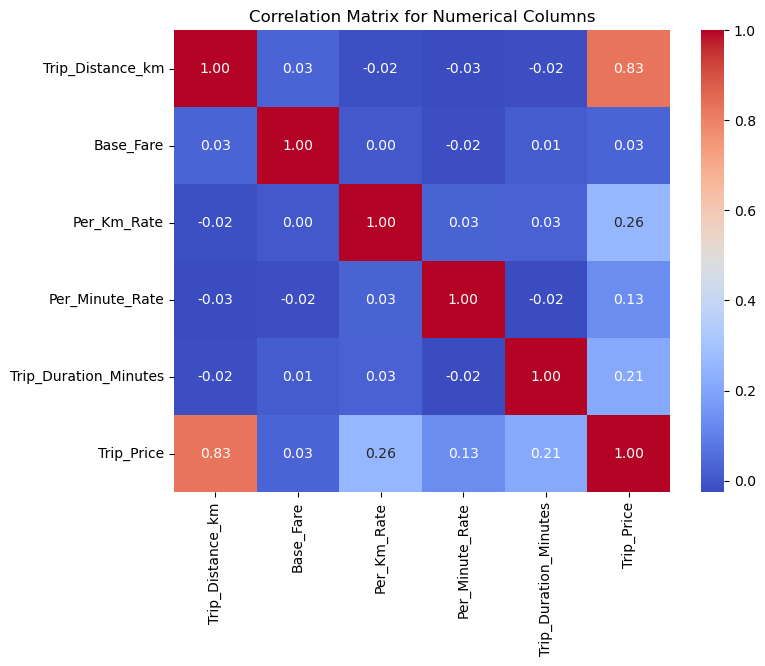

In [39]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [40]:
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Trip_Distance_km         868
Time_of_Day                4
Day_of_Week                2
Passenger_Count            4
Traffic_Conditions         3
Weather                    3
Base_Fare                290
Per_Km_Rate              150
Per_Minute_Rate           41
Trip_Duration_Minutes    918
Trip_Price               951
dtype: int64


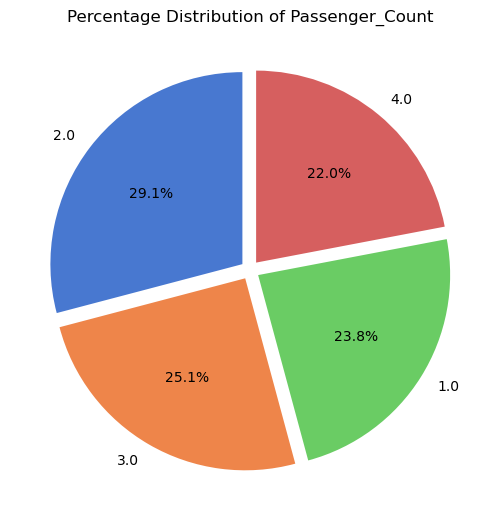

In [41]:
def plot_categorical_distributions(Categorical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    # Loop through each column and create a pie chart
    for i, column_name in enumerate(Categorical_Columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                               startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['Passenger_Count']
plot_categorical_distributions(columns_to_plot)

C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\3901581382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='muted')
C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\3901581382.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\3901581382.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')


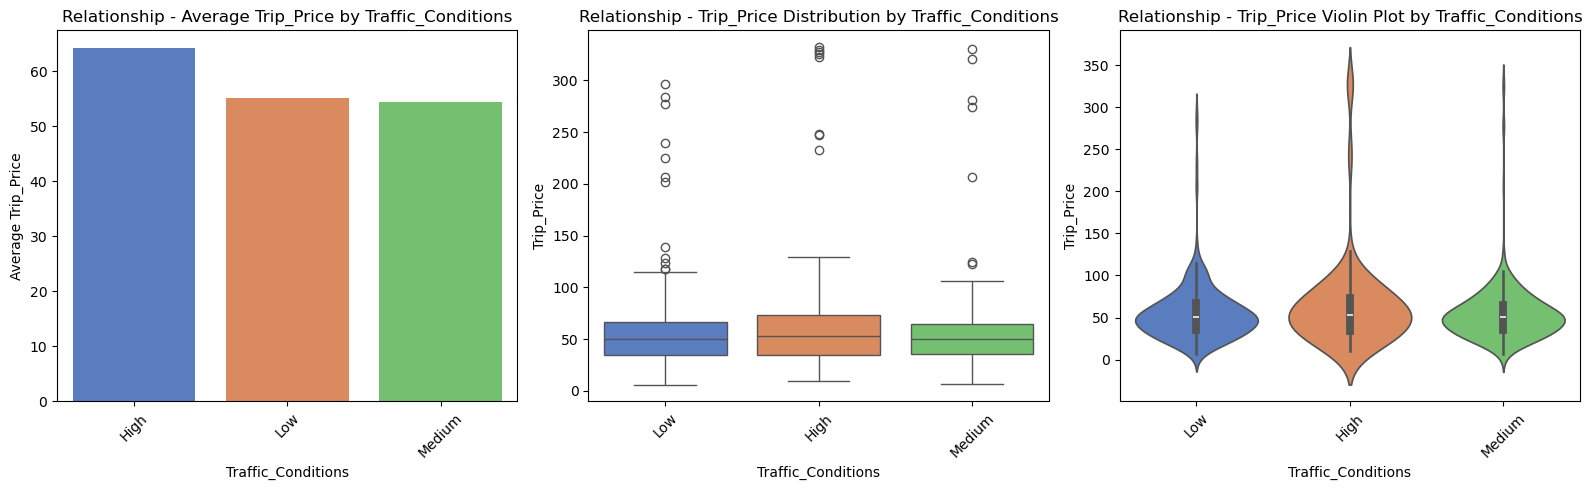

In [42]:
def plot_categorical_relationships(Categorical_Columns='column', data=df, Numerical_Columns='', title_prefix='Relationship'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_data = data.groupby(Categorical_Columns)[Numerical_Columns].mean().sort_values(ascending=False)
    sns.barplot(x=avg_data.index, y=avg_data.values, palette='muted')
    plt.title(f'{title_prefix} - Average {Numerical_Columns} by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(f'Average {Numerical_Columns}')
    plt.xticks(rotation=45)
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Distribution by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Violin Plot by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage with default parameters
target_Numerical_Columns = ['Trip_Price']
for column in target_Numerical_Columns:
    plot_categorical_relationships(Categorical_Columns='Traffic_Conditions', Numerical_Columns=column)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union
import numpy as np


def plot_categorical_relationships(
    Categorical_Columns: str = "",
    data: pd.DataFrame = df,
    Numerical_Columns: str = "",
    top_n: int = 10,
    title_prefix: str = "Analysis",
    figsize: tuple = (18, 5),
    palette: str = "muted",
    rotation: int = 45,
    min_count: int = 1,
) -> None:

    # Input validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")
    if Categorical_Columns not in data.columns:
        raise ValueError(f"Column '{Categorical_Columns}' not found in DataFrame")
    if Numerical_Columns not in data.columns:
        raise ValueError(f"Target column '{Numerical_Columns}' not found in DataFrame")
    if top_n < 1:
        raise ValueError("top_n must be positive")

    # Filter categories with minimum count
    value_counts = data[Categorical_Columns].value_counts()
    valid_categories = value_counts[value_counts >= min_count].head(top_n).index

    # Handle case when no categories meet criteria
    if len(valid_categories) == 0:
        print("No categories meet the minimum count criterion")
        return

    # Filter data
    filtered_data = data[data[Categorical_Columns].isin(valid_categories)].copy()

    # Sort categories by frequency
    category_order = filtered_data[Categorical_Columns].value_counts().index

    # Create figure
    plt.figure(figsize=figsize)

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_value = filtered_data.groupby(Categorical_Columns)[Numerical_Columns].agg(["mean", "count"])
    sns.barplot(
        x=avg_value.index,
        y="mean",
        data=avg_value,
        order=category_order,
        palette=palette,
    )
    plt.title(
        f"{title_prefix}\nAverage {Numerical_Columns} by {Categorical_Columns}\n(Top {len(valid_categories)})"
    )
    plt.xlabel(f"{Categorical_Columns}\n(n=samples in each category)")
    plt.ylabel(f"Average {Numerical_Columns}")
    plt.xticks(rotation=rotation)

    # Add sample size annotations
    for i, count in enumerate(avg_value["count"]):
        plt.text(i, 0, f"n={count}", ha="center", va="bottom")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution (Violin) by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\2770879818.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\2770879818.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\2770879818.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


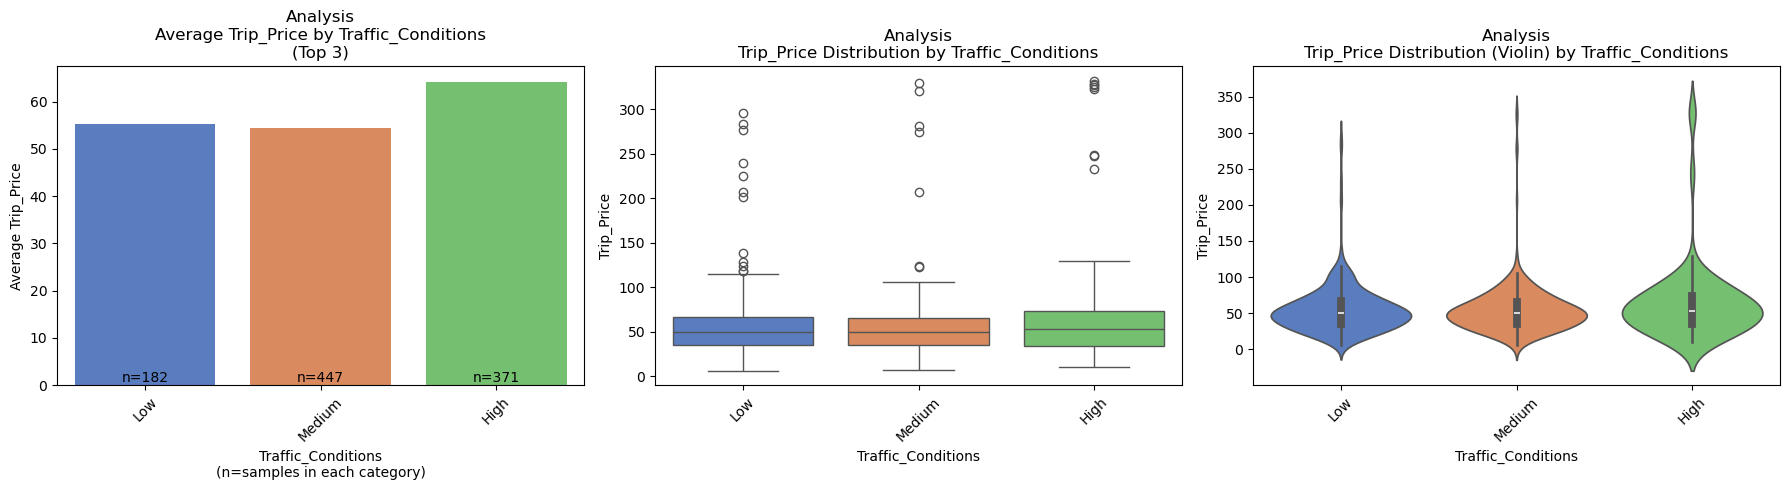

C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\2770879818.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\2770879818.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_36404\2770879818.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


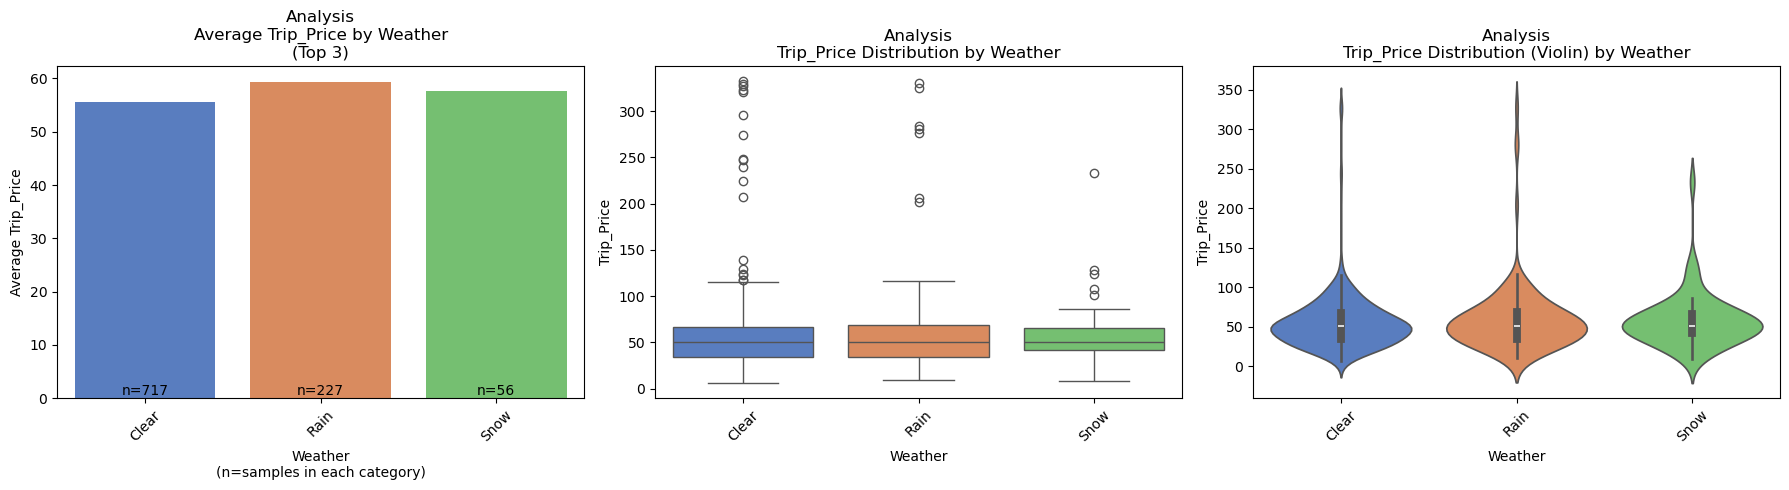

In [44]:
plot_categorical_relationships(Categorical_Columns="Traffic_Conditions", Numerical_Columns="Trip_Price")
plot_categorical_relationships(Categorical_Columns="Weather", Numerical_Columns="Trip_Price")

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb

In [46]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Time_of_Day
0 -> Afternoon
1 -> Evening
2 -> Morning
3 -> Night

Column: Day_of_Week
0 -> Weekday
1 -> Weekend

Column: Traffic_Conditions
0 -> High
1 -> Low
2 -> Medium

Column: Weather
0 -> Clear
1 -> Rain
2 -> Snow



In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('Trip_Price',axis = 1)
y = df['Trip_Price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,X_test.shape)

(800, 10) (200, 10)


=================================================================================================================================================

In [49]:
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
Knn_y_pred = knn_model.predict(X_test)

In [50]:
knn_mse = mean_squared_error(y_test, Knn_y_pred)
knn_r2 = r2_score(y_test, Knn_y_pred)
print(f"Mean Squared Error: {knn_mse}")
print(f"R2 Score: {knn_r2}")

Mean Squared Error: 367.96301726349003
R2 Score: 0.8508660909772376


=================================================================================================================================================

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [52]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f"Mean Squared Error: {lr_mse}")
print(f"R2 Score: {lr_r2}")

Mean Squared Error: 421.6583356538379
R2 Score: 0.8291035975958982


=================================================================================================================================================

In [53]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [54]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Mean Squared Error: {rf_mse}")
print(f"R2 Score: {rf_r2}")

Mean Squared Error: 152.04833886787156
R2 Score: 0.9383754288558139


=================================================================================================================================================

In [55]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train),
xgb_y_pred = xgb_model.predict(X_test)

In [56]:
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"Mean Squared Error: {xgb_mse}")
print(f"R2 Score: {xgb_r2}")

Mean Squared Error: 435.601680621081
R2 Score: 0.8234524167916905


=================================================================================================================================================

In [57]:
models = ['KNN', 'XGBoost', 'Random Forest', 'Linear Regression']
mse_scores = [knn_mse, xgb_mse, rf_mse, lr_mse]
r2_scores = [knn_r2, xgb_r2, rf_r2, lr_r2]

mse_values = [f'{score:.4f}' for score in mse_scores]  
r2_values = [f'{score:.4f}' for score in r2_scores]    

results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R^2': r2_values
})
print(results_df)

               Model       MSE     R^2
0                KNN  367.9630  0.8509
1            XGBoost  435.6017  0.8235
2      Random Forest  152.0483  0.9384
3  Linear Regression  421.6583  0.8291


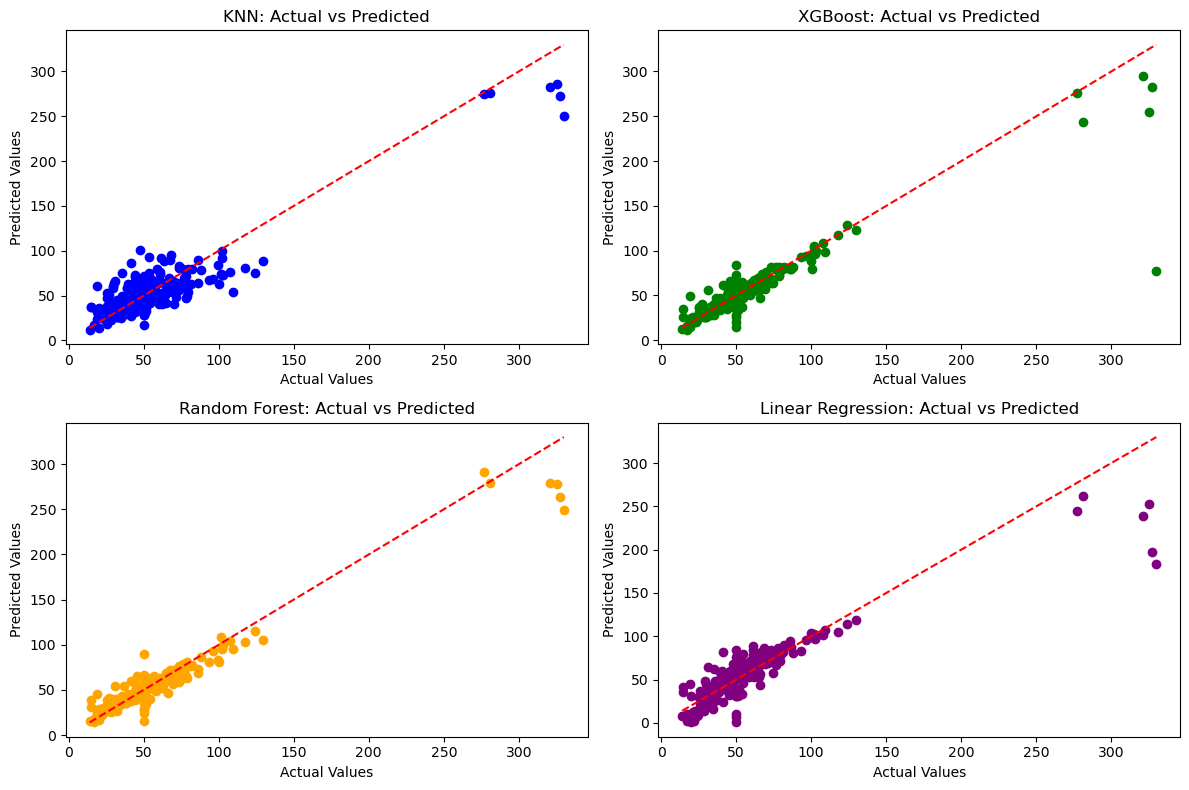

In [58]:
import matplotlib.pyplot as plt


y_test = y_test  # ค่าจริง
y_pred_knn = Knn_y_pred  # ค่าที่ทำนายจาก KNN
y_pred_xgb = xgb_y_pred  # ค่าที่ทำนายจาก XGBoost
y_pred_rf = rf_y_pred  # ค่าที่ทำนายจาก Random Forest
y_pred_lr = lr_y_pred  # ค่าที่ทำนายจาก Linear Regression

# กราฟเปรียบเทียบค่าจริงและค่าที่ทำนายจากแต่ละโมเดล
plt.figure(figsize=(12, 8))

# กราฟ KNN
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # เส้นที่แสดงการทำนายที่สมบูรณ์แบบ
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# กราฟ XGBoost
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_xgb, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # เส้นที่แสดงการทำนายที่สมบูรณ์แบบ
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# กราฟ Random Forest
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # เส้นที่แสดงการทำนายที่สมบูรณ์แบบ
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# กราฟ Linear Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_lr, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # เส้นที่แสดงการทำนายที่สมบูรณ์แบบ
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
